**dataset = https://www.kaggle.com/datasets/aladdinss/license-plate-digits-classification-dataset**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2 as cv

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [67]:
dir_path = r'C:\Users\ASUS\Downloads\kb\licenseplate\CNN letter Dataset/'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Jumlah Kelas (Huruf dan Angka): ', NUM_CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Jumlah Kelas (Huruf dan Angka):  35


In [68]:
digits_counter = {}
NUM_IMAGES = 0

for digit in digits:
    path = os.path.join(dir_path, digit)
    digits_counter[digit] = len(os.listdir(path))
    NUM_IMAGES += len(os.listdir(path))

print(digits_counter)
print('Jumlah Gambar: ', NUM_IMAGES)

{'0': 1030, '1': 1030, '2': 1030, '3': 1030, '4': 1030, '5': 1030, '6': 1030, '7': 1030, '8': 1030, '9': 1030, 'A': 1010, 'B': 1030, 'C': 1020, 'D': 1010, 'E': 1010, 'F': 1020, 'G': 1020, 'H': 1020, 'I': 1010, 'J': 1030, 'K': 1010, 'L': 1010, 'M': 1020, 'N': 1020, 'P': 1010, 'Q': 1010, 'R': 1020, 'S': 1020, 'T': 1020, 'U': 1010, 'V': 1030, 'W': 1010, 'X': 1010, 'Y': 1010, 'Z': 810}
Jumlah Gambar:  35500


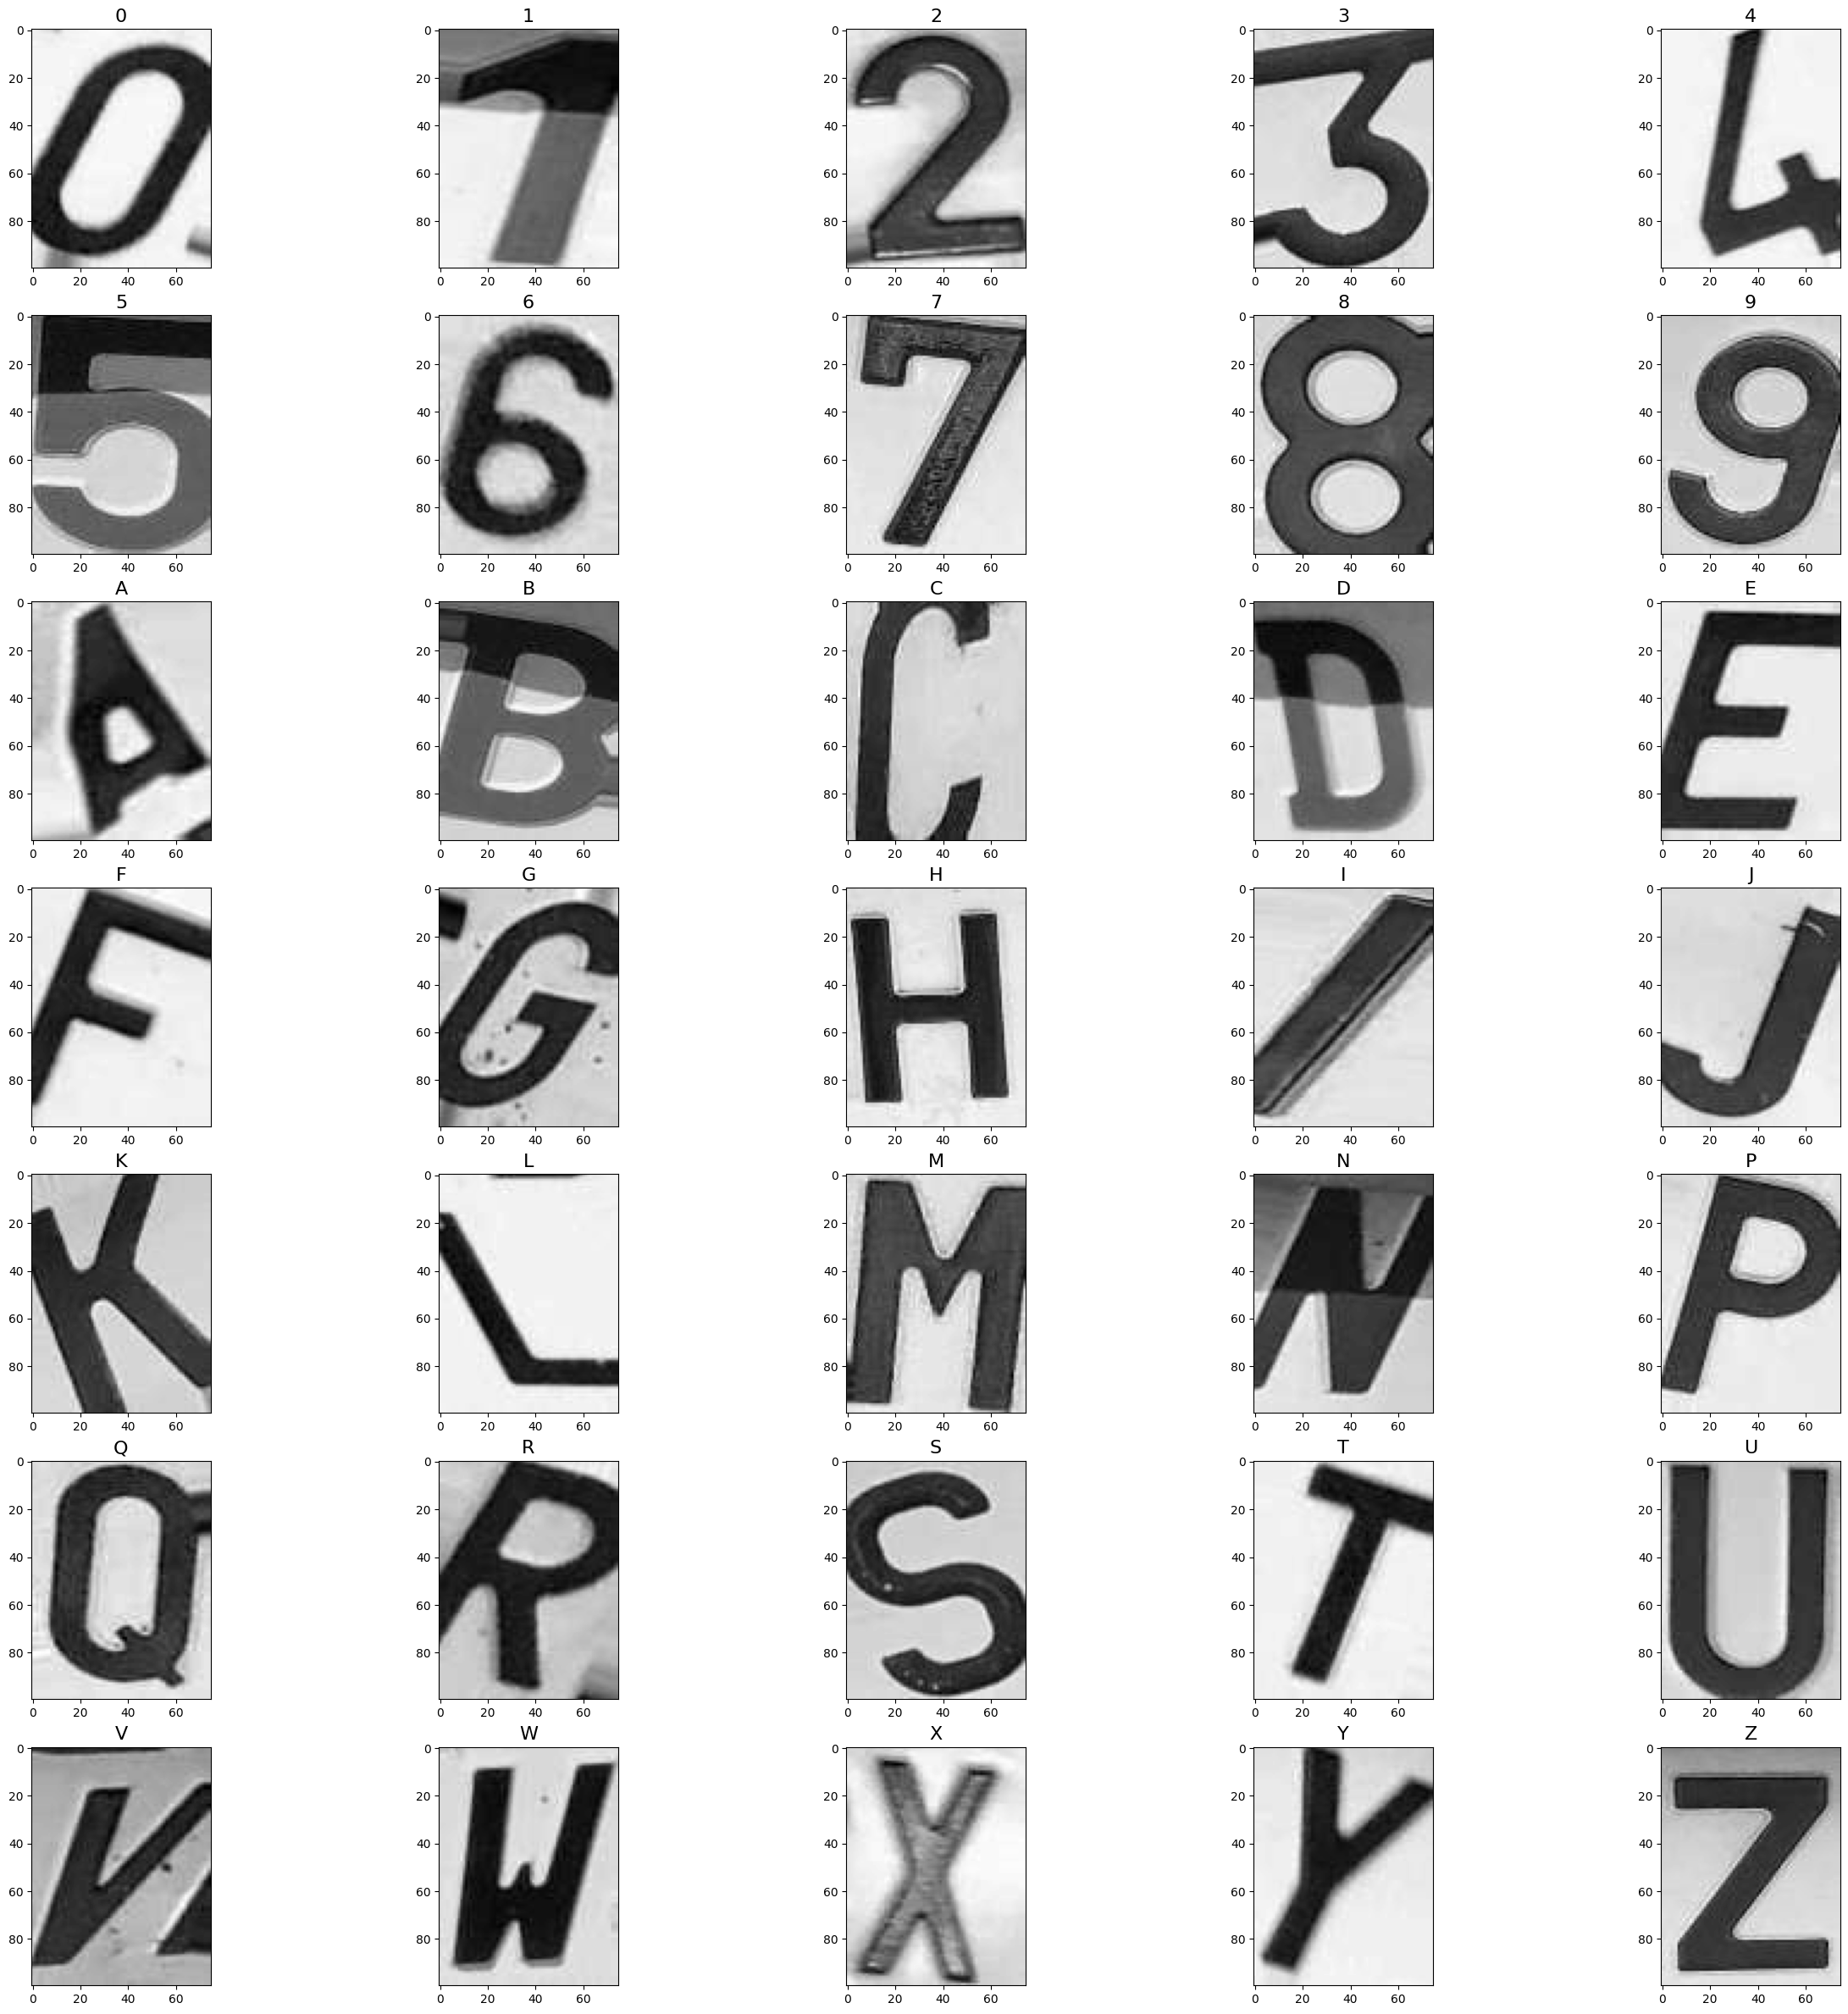

In [56]:
rows, columns = 7, 5

k = 0
fig, axes = plt.subplots(rows, columns, figsize=(30, 30))
for row in range(rows):
    for column in range(columns):
        rand_num = np.random.randint(0, digits_counter[digits[k]])
        class_path = dir_path + '/' + str(digits[k])
        image_path = class_path + '/' + str(os.listdir(class_path)[rand_num])
        ax = axes[row, column]
        ax.set_title(digits[k], loc='center', fontsize=16)
        ax.imshow(imread(image_path), cmap='gray')
        k += 1
plt.show()

In [45]:
data = []
labels = []
MAX_NUM = None  
IMG_WIDTH, IMG_HEIGHT = 32, 40

# menghapus angka 6 di folder angka 2
incorrect_img = [
    'aug20121_0.jpg',
    'aug20122_1.jpg',
    'aug20123_2.jpg',
    'aug20124_3.jpg',
    'aug20125_4.jpg',
    'aug20126_5.jpg',
    'aug20127_6.jpg',
    'aug20128_7.jpg',
    'aug20129_8.jpg',
    'aug20130_9.jpg'
]

for digit in digits:
    path = os.path.join(dir_path, digit)
    label = digits.index(digit)
    for img in os.listdir(path):
        if img in incorrect_img:
            continue
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        resized = cv.resize(img_array, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv.INTER_AREA)
        gray = cv.cvtColor(resized, cv.COLOR_RGB2GRAY)        
        data.append(gray)
        labels.append(label)
        if MAX_NUM is not None:
            if labels.count(label) == MAX_NUM:
                break

data = np.array(data, dtype='float32')
labels = np.array(labels, dtype='int8')

In [46]:
print(data.shape)

(35490, 40, 32)


In [47]:
data = data / 255.0
data = data.reshape(*data.shape, 1)
labels = to_categorical(labels, num_classes=NUM_CLASSES)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size=.3)

print("Training dataset shape: ", X_train.shape, y_train.shape)
print("Validation dataset shape: ", X_val.shape, y_val.shape)
print("Testing dataset shape: ", X_test.shape, y_test.shape)

Training dataset shape:  (17390, 40, 32, 1) (17390, 35)
Validation dataset shape:  (7453, 40, 32, 1) (7453, 35)
Testing dataset shape:  (10647, 40, 32, 1) (10647, 35)


In [61]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 32, 1)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(35, activation='softmax')
])

In [64]:
model.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/10
68/68 [==============================] - 9s 98ms/step - loss: 2.5687 - accuracy: 0.3926 - val_loss: 3.4683 - val_accuracy: 0.0873
Epoch 2/10
68/68 [==============================] - 7s 96ms/step - loss: 1.6671 - accuracy: 0.7277 - val_loss: 3.4072 - val_accuracy: 0.1391
Epoch 3/10
68/68 [==============================] - 6s 95ms/step - loss: 1.2489 - accuracy: 0.8549 - val_loss: 3.3069 - val_accuracy: 0.2174
Epoch 4/10
68/68 [==============================] - 7s 97ms/step - loss: 0.9491 - accuracy: 0.9214 - val_loss: 3.1043 - val_accuracy: 0.3232
Epoch 5/10
68/68 [==============================] - 7s 96ms/step - loss: 0.7281 - accuracy: 0.9539 - val_loss: 2.7856 - val_accuracy: 0.4915
Epoch 6/10
68/68 [==============================] - 6s 96ms/step - loss: 0.5613 - accuracy: 0.9704 - val_loss: 2.3295 - val_accuracy: 0.6722
Epoch 7/10
68/68 [==============================] - 6s 93ms/step - loss: 0.4384 - accuracy: 0.9815 - val_loss: 1.7559 - val_accuracy: 0.8646
Epoch 8/10
68

In [66]:
val = model.evaluate(X_val,y_val)

print("Loss:", val[0])
print("Accuracy:", val[1])

233/233 [==============================] - 2s 8ms/step - loss: 0.4966 - accuracy: 0.9822
Loss: 0.49655482172966003
Accuracy: 0.9821548461914062
